In [1]:
from scipy import *
from scipy.constants import *
import numpy as np
import matplotlib.pyplot as plt

## (a)


In [2]:
N = 8
xmin = 0
xmax = 2 * pi
x = [xmin + i * (xmax-xmin)/N for i in range(N)]

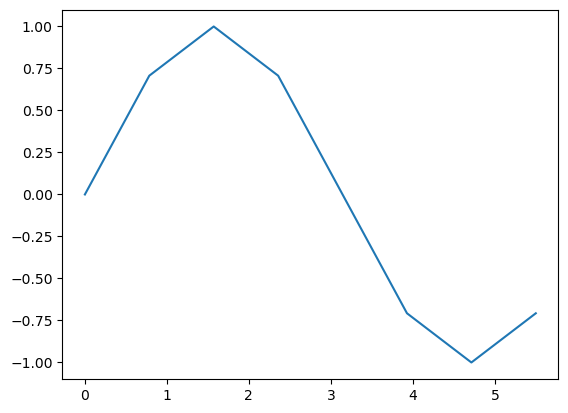

In [3]:
f = np.sin(x)
plt.plot(x,f)

In [4]:
fhat = fft.fft(f)
freq = fft.fftfreq(N, 2 * pi / N)

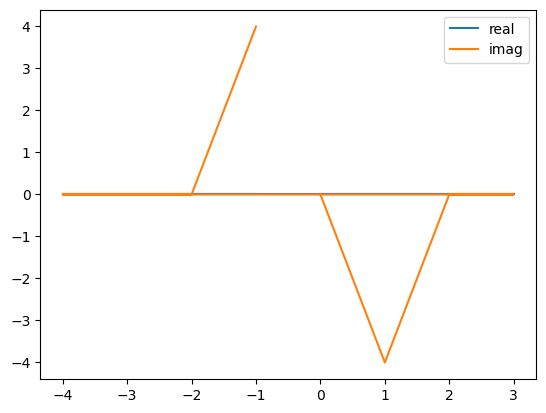

In [5]:
plt.plot(2 * pi * freq, np.real(fhat), label="real")
plt.plot(2 * pi * freq, np.imag(fhat), label="imag")
plt.legend()

### We see that the coefficients corresponding to $k=\pm1$ are $\mp4i$, where the true values are $\mp\frac i2$.
Seems like there's an extra factor of $N$ that `fft` multiplies the true coefficients with.

In [6]:
def check_fourier_coeff(N):
    xmin = 0
    xmax = 2 * pi
    x = [xmin + i * (xmax-xmin)/N for i in range(N)]
    f = np.sin(x)
    fhat = fft.fft(f)
    freq = fft.fftfreq(N, 2 * pi / N)
    coeff = np.imag(fhat[1])
    print(f"N={N}: For k=1, fft says {coeff}j, which is {-2 * coeff} times the true value.")

In [7]:
for n in range(2,10):
    N = 2**n
    check_fourier_coeff(N)

N=4: For k=1, fft says -2.0j, which is 4.0 times the true value.
N=8: For k=1, fft says -4.0j, which is 8.0 times the true value.
N=16: For k=1, fft says -8.0j, which is 16.0 times the true value.
N=32: For k=1, fft says -16.0j, which is 32.0 times the true value.
N=64: For k=1, fft says -32.0j, which is 64.0 times the true value.
N=128: For k=1, fft says -64.0j, which is 128.0 times the true value.
N=256: For k=1, fft says -128.0j, which is 256.0 times the true value.
N=512: For k=1, fft says -256.0j, which is 512.0 times the true value.


## We can conclude thet `scipy.fft.fft` provides coefficients that are scaled up by $N$.

## (b)             

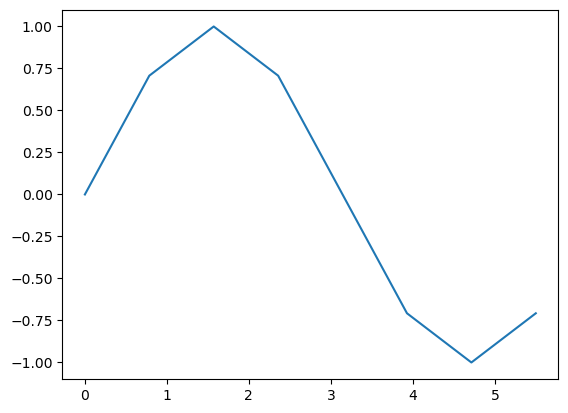

In [8]:
plt.plot(x, np.real(fft.ifft(fhat)))

## We do indeed get the original function with `ifft` on the result of `fft`.

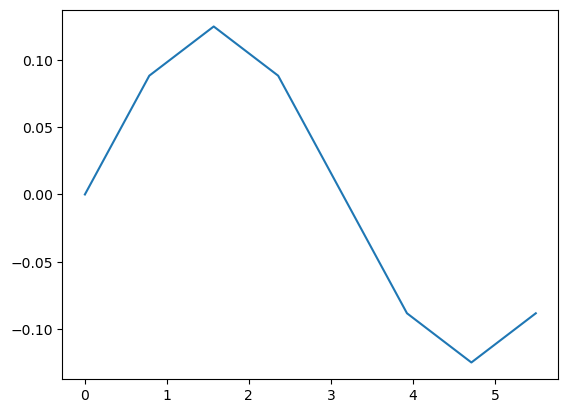

In [9]:
plt.plot(x, np.real(fft.ifft([0, -1j/2, 0, 0, 0, 0, 0, 1j/2])))

### With the true coefficients, the output is scaled by $N$ in this case, as expected.

## (c) 


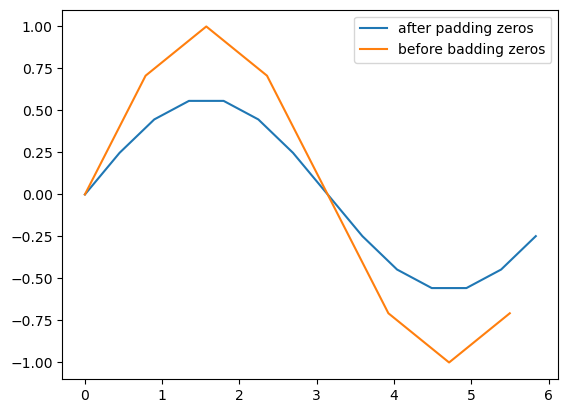

In [10]:
fhat = fft.fft(f)
N = 8
M = 6
fhat = fft.fftshift(fhat)
fhat = np.append(fhat, np.zeros(int(M/2)))
fhat = np.append(np.zeros(int(M/2)), fhat)

fhat = fft.fftshift(fhat)
fnew = fft.ifft(fhat)

xnew = [xmin + i * (xmax-xmin) / (N+M) for i in range(N+M)]
plt.plot(xnew, fnew.real, label='after padding zeros')
plt.plot(x, f, label = 'before badding zeros')
plt.legend()
plt.show()

## The newer one is scaled down.

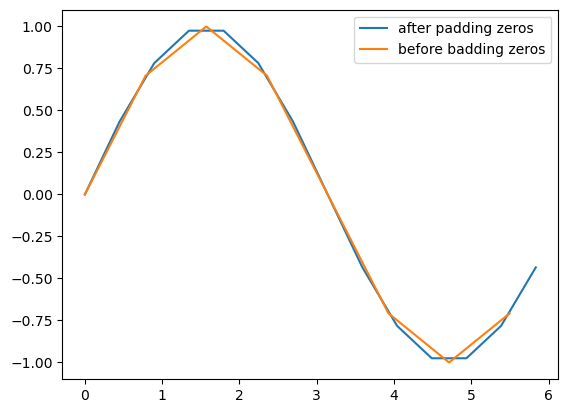

In [11]:
f = np.sin(x)
fhat = fft.fft(f)

fhat /= N

fhat = fft.fftshift(fhat)
fhat = np.append(fhat, np.zeros(int(M/2)))
fhat = np.append(np.zeros(int(M/2)), fhat)

fhat *= N+M

fhat = fft.fftshift(fhat)
fnew = fft.ifft(fhat)

xnew = [xmin + i * (xmax-xmin) / (N+M) for i in range(N+M)]
plt.plot(xnew, fnew, label='after padding zeros')
plt.plot(x, f, label = 'before badding zeros')
plt.legend()
plt.show()

### This time the scales match up, because we are accounting for the division by $N$ during the `ifft`.

## (d)

In [12]:
fhat = fft.fft(f)
freq = fft.fftfreq(N, 1/N)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

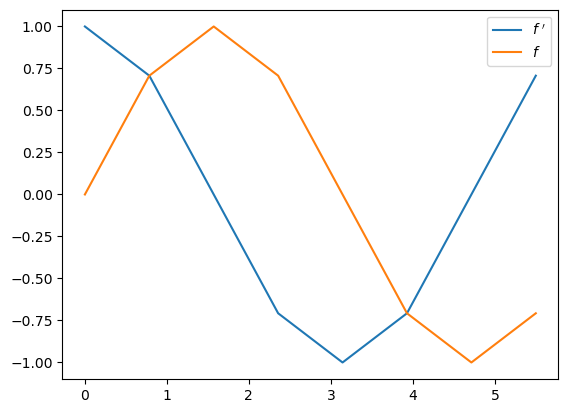

In [13]:
fprimehat = fhat * freq * 1j
fprime = fft.ifft(fprimehat)
plt.plot(x, fprime, label='$f\ \'$')
plt.plot(x, f, label='$f$')
plt.legend()

In [14]:
def ft_derivative(fhat):
    N = len(fhat)
    freq = fft.fftfreq(N, 1/N)
    return 1j * freq * fhat
def check(func):
    f = func(x)
    plt.plot(x, f)
    plt.plot(x, np.real(fft.ifft( ft_derivative( fft.fft( f ) ))))

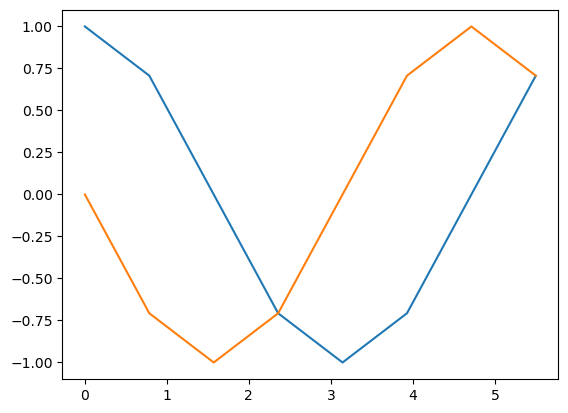

In [15]:
check(np.cos)

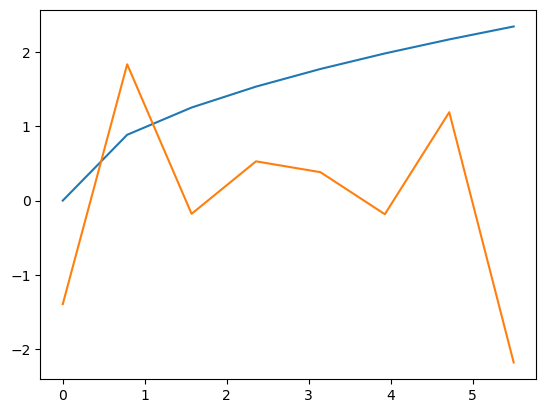

In [16]:
check(np.sqrt)

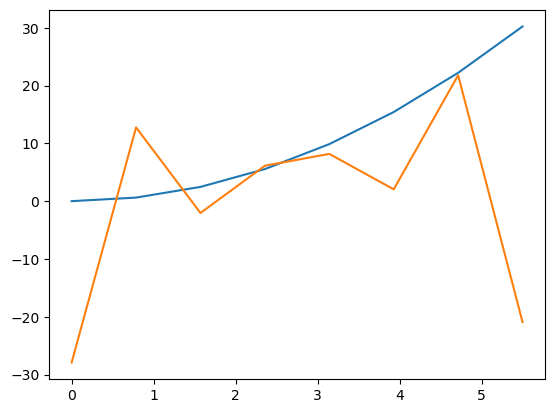

In [17]:
check(lambda x: [i**2 for i in x])

## These values aren't very accurate because we are inputting non-periodic functions.

## Checking constant function

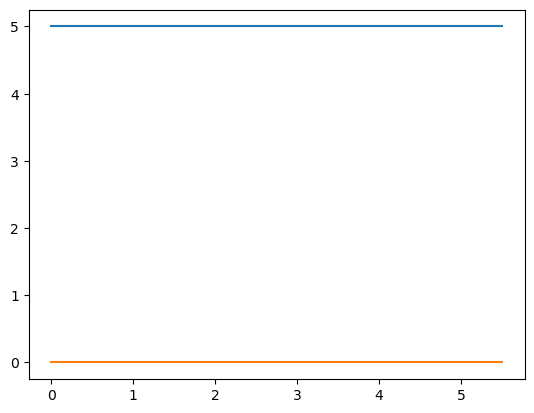

In [18]:
check(lambda x: [5 for i in x])

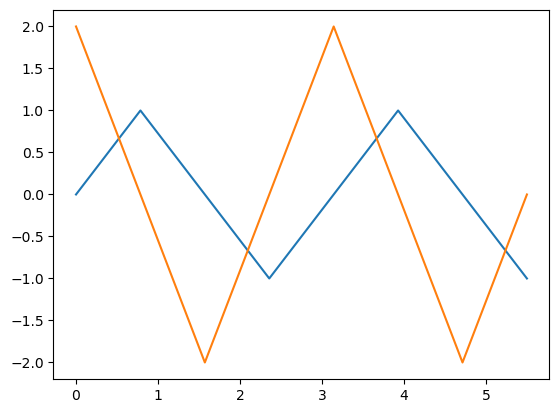

In [19]:
check(lambda x: [np.sin(2 * i) for i in x])